In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis

data = pd.read_csv("bostonh.dat", sep = "\s+", header=None)

xt = data.copy()

for i in [0, 2, 4, 5, 7, 8, 9, 13]:
    xt.iloc[:, i] = np.log(data.iloc[:, i])
    
xt.iloc[:, 1] = data.iloc[:, 1]/10
xt.iloc[:, 6] = (data.iloc[:, 6]**2.5)/10000
xt.iloc[:, 10] = np.exp(0.4 * data.iloc[:, 10])/1000
xt.iloc[:, 11] = (data.iloc[:, 11])/100
xt.iloc[:, 12] = np.sqrt(data.iloc[:, 12])

data = xt.drop(3, axis=1)

cols = []
for i in [1, 2, 3] + list(range(5, 15)):
    cols.append("X" + str(i))

data.columns = cols

da  = (data - np.mean(data))/np.std(data) 
dat = da.corr()

In [212]:
# Maximum Likelihood Factor Analysis without varimax rotation factanal performs
mlm = FactorAnalysis(n_components=3).fit(da)
ld = mlm.components_
com = np.diag(np.dot(ld.T, ld))
psi = np.diag(dat) - com
tbl = pd.DataFrame({"ld1": ld[0], "ld2": ld[1], "ld3": ld[2], "com": com, "psi": psi}, 
                   columns = ["ld1", "ld2", "ld3", "com", "psi"])

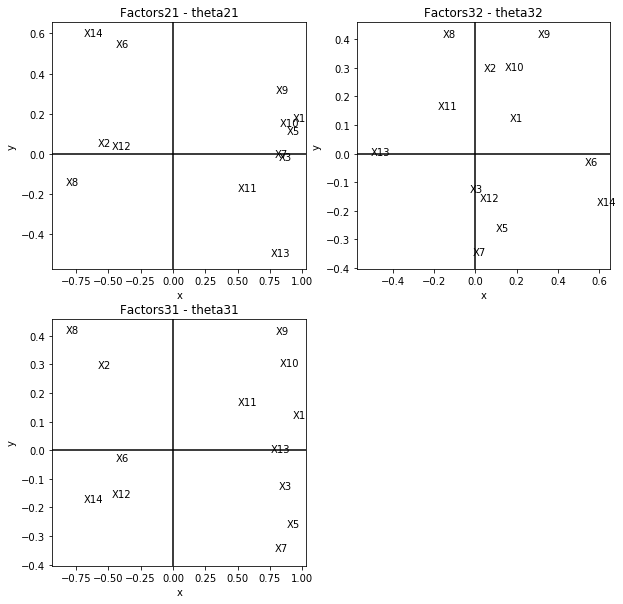

In [132]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# plot first factor against second
axes[0, 0].scatter(ld[0], ld[1], c = "w")
for i in range(0, len(cols)):
    axes[0, 0].text(ld[0][i], ld[1][i], cols[i])
axes[0, 0].set_ylim(axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].set_xlim(axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].vlines(0, axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].hlines(0, axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].set_title("Factors21 - theta21")

# plot second factor against third
axes[0, 1].scatter(ld[1], -ld[2], c = "w")
for i in range(0, len(cols)):
    axes[0, 1].text(ld[1][i], -ld[2][i], cols[i])
axes[0, 1].set_ylim(axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].set_xlim(axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].vlines(0, axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].hlines(0, axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].set_title("Factors32 - theta32")

# plot first factor against third
axes[1, 0].scatter(ld[0], -ld[2], c = "w")
for i in range(0, len(cols)):
    axes[1, 0].text(ld[0][i], -ld[2][i], cols[i])
axes[1, 0].set_ylim(axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].set_xlim(axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].vlines(0, axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].hlines(0, axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("y")
axes[1, 0].set_title("Factors31 - theta31")

fig.delaxes(axes[1,1])

plt.show()

In [7]:
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = np.eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)
        u,s,vh = np.linalg.svd(np.dot(Phi.T,np.asarray(Lambda)**3 - (gamma/p) * np.dot(Lambda, np.diag(np.diag(np.dot(Lambda.T,Lambda))))))
        R = np.dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return np.dot(Phi, R)

In [213]:
# Maximum Likelihood Factor Analysis after varimax rotation

load = varimax(ld.T)

vl = pd.DataFrame({"0": -load[:,2], "1": load[:,1], "2": -load[:,0]})

com = np.diag(np.dot(vl, vl.T))

psi = np.diag(dat) - com

tbl = pd.DataFrame({"ld1": -load[:,2], "ld2": load[:,1], "ld3": -load[:,0], "com": com, "psi": psi}, 
                   columns = ["ld1", "ld2", "ld3", "com", "psi"])

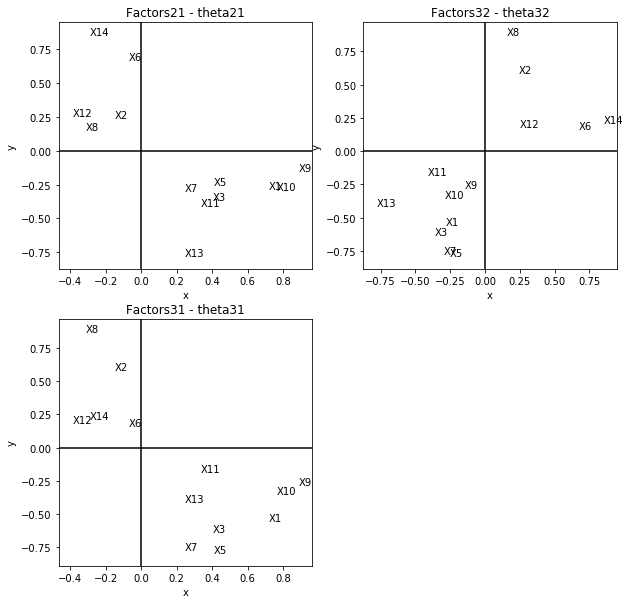

In [216]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# plot first factor against second
axes[0, 0].scatter(vl.iloc[:, 0], vl.iloc[:, 1], c = "w")
for i in range(0, len(cols)):
    axes[0, 0].text(vl.iloc[:, 0][i], vl.iloc[:, 1][i], cols[i])
axes[0, 0].set_ylim(axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].set_xlim(axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].vlines(0, axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].hlines(0, axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].set_title("Factors21 - theta21")

# plot second factor against third
axes[0, 1].scatter(vl.iloc[:, 1], vl.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[0, 1].text(vl.iloc[:, 1][i], vl.iloc[:, 2][i], cols[i])
axes[0, 1].set_ylim(axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].set_xlim(axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].vlines(0, axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].hlines(0, axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].set_title("Factors32 - theta32")

# plot first factor against third
axes[1, 0].scatter(vl.iloc[:, 0], vl.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[1, 0].text(vl.iloc[:, 0][i], vl.iloc[:, 2][i], cols[i])
axes[1, 0].set_ylim(axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].set_xlim(axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].vlines(0, axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].hlines(0, axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("y")
axes[1, 0].set_title("Factors31 - theta31")

fig.delaxes(axes[1,1])

plt.show()

In [219]:
# Principal Component Method after varimax rotation spectral decomposition

e = np.linalg.eig(dat)
eigval = e[0][:3]
eigvec = e[1][:,:3].T
E = np.tile(np.array(eigval), (len(dat), 1))
Q = np.sqrt(E) * eigvec.T
load = varimax(Q)
ld = pd.DataFrame({"0": load[:,0], "1": -load[:,1], "2": load[:,2]})
com = np.diag(np.dot(ld, ld.T))
psi = np.diag(dat) - com
tbl = pd.DataFrame({"ld1": load[:,0], "ld2": -load[:,1], "ld3": load[:,2], "com": com, "psi": psi}, 
                   columns = ["ld1", "ld2", "ld3", "com", "psi"])

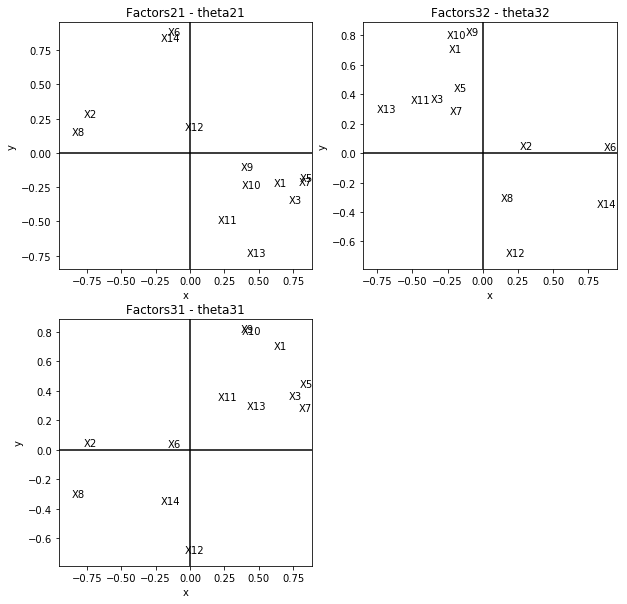

In [221]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# plot first factor against second
axes[0, 0].scatter(ld.iloc[:, 0], ld.iloc[:, 1], c = "w")
for i in range(0, len(cols)):
    axes[0, 0].text(ld.iloc[:, 0][i], ld.iloc[:, 1][i], cols[i])
axes[0, 0].set_ylim(axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].set_xlim(axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].vlines(0, axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].hlines(0, axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].set_title("Factors21 - theta21")

# plot second factor against third
axes[0, 1].scatter(ld.iloc[:, 1], ld.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[0, 1].text(ld.iloc[:, 1][i], ld.iloc[:, 2][i], cols[i])
axes[0, 1].set_ylim(axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].set_xlim(axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].vlines(0, axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].hlines(0, axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].set_title("Factors32 - theta32")

# plot first factor against third
axes[1, 0].scatter(ld.iloc[:, 0], ld.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[1, 0].text(ld.iloc[:, 0][i], ld.iloc[:, 2][i], cols[i])
axes[1, 0].set_ylim(axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].set_xlim(axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].vlines(0, axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].hlines(0, axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("y")
axes[1, 0].set_title("Factors31 - theta31")

fig.delaxes(axes[1,1])

plt.show()

In [17]:
# Principal Factor Method after varimax rotation inverse of the correlation matrix

f = np.linalg.inv(dat)
psiini = np.diag(1/np.diagonal(f)) # preliminary estimate of psi
psi = psiini.copy()

for i in range(1, 11):
    ee = np.linalg.eig(dat - psi)
    eigval = ee[0][:3]
    eigvec = ee[1][:,:3].T
    EE = np.tile(np.array(eigval), (len(dat), 1))
    QQ = np.sqrt(EE) * eigvec.T
    psiold = psi.copy()
    psi = np.diag(1 - sum((QQ * QQ).T))
    i += 1
    z = psi - psiold
    convergence = np.diagonal(z)

load = varimax(QQ)
ld = pd.DataFrame({"0": -load[:,0], "1": load[:,1], "2": load[:,2]})
com = np.diag(np.dot(ld, ld.T))
psi = np.diag(dat) - com
tbl = pd.DataFrame({"ld1": -load[:,0], "ld2": load[:,1], "ld3": load[:,2], "com": com, "psi": psi}, 
                   columns = ["ld1", "ld2", "ld3", "com", "psi"])

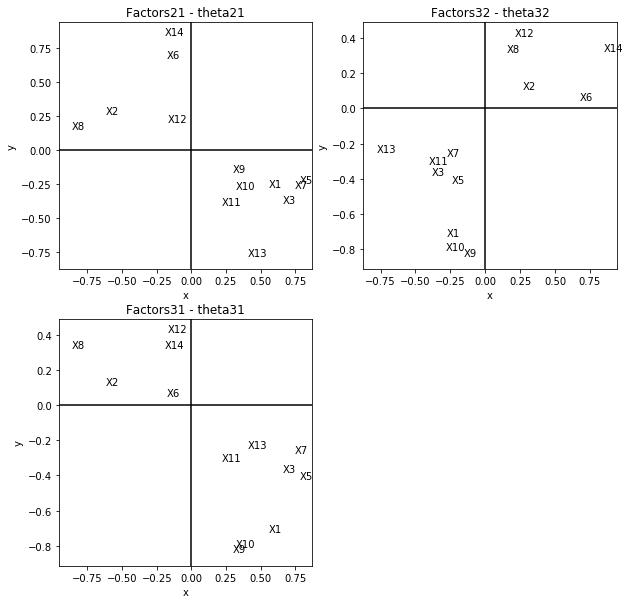

In [18]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10))

# plot first factor against second
axes[0, 0].scatter(ld.iloc[:, 0], ld.iloc[:, 1], c = "w")
for i in range(0, len(cols)):
    axes[0, 0].text(ld.iloc[:, 0][i], ld.iloc[:, 1][i], cols[i])
axes[0, 0].set_ylim(axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].set_xlim(axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].vlines(0, axes[0, 0].get_ylim()[0], axes[0, 0].get_ylim()[1])
axes[0, 0].hlines(0, axes[0, 0].get_xlim()[0], axes[0, 0].get_xlim()[1])
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].set_title("Factors21 - theta21")

# plot second factor against third
axes[0, 1].scatter(ld.iloc[:, 1], ld.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[0, 1].text(ld.iloc[:, 1][i], ld.iloc[:, 2][i], cols[i])
axes[0, 1].set_ylim(axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].set_xlim(axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].vlines(0, axes[0, 1].get_ylim()[0], axes[0, 1].get_ylim()[1])
axes[0, 1].hlines(0, axes[0, 1].get_xlim()[0], axes[0, 1].get_xlim()[1])
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].set_title("Factors32 - theta32")

# plot first factor against third
axes[1, 0].scatter(ld.iloc[:, 0], ld.iloc[:, 2], c = "w")
for i in range(0, len(cols)):
    axes[1, 0].text(ld.iloc[:, 0][i], ld.iloc[:, 2][i], cols[i])
axes[1, 0].set_ylim(axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].set_xlim(axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].vlines(0, axes[1, 0].get_ylim()[0], axes[1, 0].get_ylim()[1])
axes[1, 0].hlines(0, axes[1, 0].get_xlim()[0], axes[1, 0].get_xlim()[1])
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("y")
axes[1, 0].set_title("Factors31 - theta31")

fig.delaxes(axes[1,1])

plt.show()